In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# INTRODUCTION TO DATA MATRICES

Data matrices are fundamental structures in data science and machine learning.
They organize data in a way that makes it easy to manipulate and analyze.
In this notebook, we will explore how to represent different types of data as matrices.

**Table of contents**

* [Tabular Data](#tabular)
    * [Numerical features](#numerical)
    * [Encoding ordinal features](#ordinal)
    * [Encoding categorical features](#categorical)
* [Images](#images)
* [Graphs](#graphs)
    * [Importing NetworkX](#networkx)
    * [Building an Undirected Graph from a DataFrame](#graph)
    * [Accessing Attributes of the Graph](#graph_attributes)
    * [Drawing the Graph](#graph_drawing)
    * [Getting the Adjacency Matrix](#adjacency)
    * [Building a Directed Graph from a DataFrame](#directed_graph)
* [Text Data](#text)
    * [Count Vectorizer](#count_vectorizer)
    * [TF-IDF Vectorizer](#tf_idf_vectorizer)
    * [Lemmatizing](#lemmatizing)
    * [Removing Stop Words and Punctuation](#stop_words)

## 1. TABULAR DATA <a class="anchor" id="tabular"></a>

Spreadsheets or databases use tabular data. Each row represents a record, and each column represents a feature.

The following dataset contains information about 20 houses. Each row represents a house, and each column represents a feature of the house. The features include numerical, ordinal, and categorical data.

In [5]:
# load the data from the Github repo
df = pd.read_csv('Toy_House_Dataset.csv',index_col='House_ID')
df

,Price,Size_sqft,Num_Bedrooms,Neighborhood,Condition,Year_Built
House_ID,,,,,,
1,250000,1500,3,A,Good,2005
2,350000,1800,4,B,Excellent,2010
3,280000,1700,3,A,Fair,2003
4,450000,2000,5,C,Good,2015
5,300000,1600,3,A,Fair,2000
6,320000,1750,3,B,Good,2008
7,400000,1900,4,C,Excellent,2012
8,500000,2100,5,C,Good,2018
9,275000,1650,3,A,Fair,2001


**Feature Descriptions**

| Feature       | Description                                             |
|---------------|---------------------------------------------------------|
| House_ID      | Unique identifier for each house                        |
| Price         | Price of the house in dollars                           |
| Size_sqft     | Size of the house in square feet                        |
| Num_Bedrooms  | Number of bedrooms in the house                         |
| Neighborhood  | Categorical feature representing the neighborhood       |
| Condition     | Ordinal feature representing the condition of the house (Fair, Good, Excellent) |
| Year_Built    | The year the house was built                            |

### 1.1. Numerical features <a class="anchor" id="numerical"></a>

We will extract the numerical features from our dataset and store them in a numpy array $A$.
This array will include the columns: `Price`, `Size_sqft`, `Num_Bedrooms`, and `Year_Built`.

In [6]:
numerical_features = ['Price', 'Size_sqft', 'Num_Bedrooms', 'Year_Built']
A = df[numerical_features].to_numpy()
A

array([[250000,   1500,      3,   2005],
       [350000,   1800,      4,   2010],
       [280000,   1700,      3,   2003],
       [450000,   2000,      5,   2015],
       [300000,   1600,      3,   2000],
       [320000,   1750,      3,   2008],
       [400000,   1900,      4,   2012],
       [500000,   2100,      5,   2018],
       [275000,   1650,      3,   2001],
       [315000,   1850,      4,   2006],
       [290000,   1550,      3,   2004],
       [330000,   1950,      4,   2011],
       [375000,   2050,      5,   2009],
       [425000,   2200,      5,   2014],
       [285000,   1750,      3,   2002],
       [295000,   1650,      3,   2007],
       [340000,   1800,      4,   2013],
       [380000,   1900,      4,   2016],
       [410000,   2000,      5,   2017],
       [360000,   1850,      4,   2005]], dtype=int64)

### 1.2. Encoding ordinal features <a class="anchor" id="ordinal"></a>

Next, we will extract the ordinal feature Condition and encode it using the [`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder) from [`sklearn`](https://scikit-learn.org/stable/).
Ordinal encoding assigns numerical values to categorical data based on their order.

In [7]:
# import the ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# Extract the ordinal feature
ordinal_feature = df[['Condition']]

# Apply OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Fair', 'Good', 'Excellent']])
encoded_ordinal = encoder.fit_transform(ordinal_feature)
encoded_ordinal

array([[1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.]])

This encoder transforms categorical values into numerical values based on their order. 
In this case, `Fair` -> 0, `Good` -> 1, and `Excellent` -> 2.

We use `np.hstack` to horizontally stack the encoded ordinal feature with our existing numerical features in matrix A.

In [8]:
A = np.hstack((A, encoded_ordinal))
A

array([[2.500e+05, 1.500e+03, 3.000e+00, 2.005e+03, 1.000e+00],
       [3.500e+05, 1.800e+03, 4.000e+00, 2.010e+03, 2.000e+00],
       [2.800e+05, 1.700e+03, 3.000e+00, 2.003e+03, 0.000e+00],
       [4.500e+05, 2.000e+03, 5.000e+00, 2.015e+03, 1.000e+00],
       [3.000e+05, 1.600e+03, 3.000e+00, 2.000e+03, 0.000e+00],
       [3.200e+05, 1.750e+03, 3.000e+00, 2.008e+03, 1.000e+00],
       [4.000e+05, 1.900e+03, 4.000e+00, 2.012e+03, 2.000e+00],
       [5.000e+05, 2.100e+03, 5.000e+00, 2.018e+03, 1.000e+00],
       [2.750e+05, 1.650e+03, 3.000e+00, 2.001e+03, 0.000e+00],
       [3.150e+05, 1.850e+03, 4.000e+00, 2.006e+03, 1.000e+00],
       [2.900e+05, 1.550e+03, 3.000e+00, 2.004e+03, 2.000e+00],
       [3.300e+05, 1.950e+03, 4.000e+00, 2.011e+03, 0.000e+00],
       [3.750e+05, 2.050e+03, 5.000e+00, 2.009e+03, 1.000e+00],
       [4.250e+05, 2.200e+03, 5.000e+00, 2.014e+03, 2.000e+00],
       [2.850e+05, 1.750e+03, 3.000e+00, 2.002e+03, 0.000e+00],
       [2.950e+05, 1.650e+03, 3.000e+00,

### 1.3. Encoding categorical features <a class="anchor" id="categorical"></a>

Next, we will extract the categorical feature `Neighborhood` and encode it using the [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) from [`sklearn`](https://scikit-learn.org/stable/).
This encoder transforms categorical values into a binary column for each category.
For example, if we have neighborhoods 'A', 'B', and 'C', the encoder will create three columns with binary values indicating the presence of each neighborhood.

In [16]:
# import the one-hot encoder
from sklearn.preprocessing import OneHotEncoder

# Extract the categorical feature
categorical_feature = df[['Neighborhood']]

# Apply OneHotEncoder
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(categorical_feature)
encoded_categorical

<20x3 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

The encoder outputs a sparse matrix to save space by storing only non-zero values. Sparse matrices are efficient for storage but need to be converted to dense format for certain operations.

In [17]:
# Convert to dense matrix
encoded_categorical = encoded_categorical.todense()
encoded_categorical

matrix([[1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.]])

We use `np.hstack` to horizontally stack the encoded categorical feature with our existing matrix A.

In [18]:
A = np.hstack((A, encoded_categorical))
A

matrix([[2.500e+05, 1.500e+03, 3.000e+00, 2.005e+03, 1.000e+00,
         1.000e+00, 0.000e+00, 0.000e+00],
        [3.500e+05, 1.800e+03, 4.000e+00, 2.010e+03, 2.000e+00,
         0.000e+00, 1.000e+00, 0.000e+00],
        [2.800e+05, 1.700e+03, 3.000e+00, 2.003e+03, 0.000e+00,
         1.000e+00, 0.000e+00, 0.000e+00],
        [4.500e+05, 2.000e+03, 5.000e+00, 2.015e+03, 1.000e+00,
         0.000e+00, 0.000e+00, 1.000e+00],
        [3.000e+05, 1.600e+03, 3.000e+00, 2.000e+03, 0.000e+00,
         1.000e+00, 0.000e+00, 0.000e+00],
        [3.200e+05, 1.750e+03, 3.000e+00, 2.008e+03, 1.000e+00,
         0.000e+00, 1.000e+00, 0.000e+00],
        [4.000e+05, 1.900e+03, 4.000e+00, 2.012e+03, 2.000e+00,
         0.000e+00, 0.000e+00, 1.000e+00],
        [5.000e+05, 2.100e+03, 5.000e+00, 2.018e+03, 1.000e+00,
         0.000e+00, 0.000e+00, 1.000e+00],
        [2.750e+05, 1.650e+03, 3.000e+00, 2.001e+03, 0.000e+00,
         1.000e+00, 0.000e+00, 0.000e+00],
        [3.150e+05, 1.850e+03, 4.000e

We have successfully transformed our dataset into a format suitable for machine learning algorithms.
Our matrix A now includes:

- Numerical Features: Price, Size_sqft, Num_Bedrooms, Year_Built
- Encoded Ordinal Feature: Condition (0 for Fair, 1 for Good, 2 for Excellent)
- Encoded Categorical Feature: Neighborhood (A: [1, 0, 0], B: [0, 1, 0], C: [0, 0, 1])

## 2. IMAGES <a class="anchor" id="images"></a>

An image is a matrix where each element represents a pixel's intensity.

To work with images in Python, it's often easier to use libraries like PIL (Pillow) or OpenCV.
These libraries provide convenient methods to read and manipulate images. 
Here, we'll use [Pillow](https://pillow.readthedocs.io/en/stable/) to open the image and extract the three color channels (red, green, and blue).

Ensure you have the Pillow library installed. If not, install it using "pip install pillow".

In [84]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Open the image using Pillow
image_path = 'Tova_the_cat.png'
image = Image.open(image_path)

# Convert the image to a numpy array
image_array = np.array(image)
image_array

array([[[112, 100, 115],
        [109,  96, 111],
        [113,  99, 114],
        ...,
        [ 54,  64,  67],
        [ 56,  66,  66],
        [ 55,  65,  64]],

       [[113,  98, 117],
        [113,  97, 116],
        [106,  90, 108],
        ...,
        [ 54,  66,  66],
        [ 56,  66,  66],
        [ 56,  66,  64]],

       [[107,  92, 111],
        [117, 101, 121],
        [111,  94, 113],
        ...,
        [ 56,  68,  68],
        [ 58,  69,  69],
        [ 58,  67,  66]],

       ...,

       [[ 49,  43,  47],
        [ 60,  53,  59],
        [ 54,  47,  54],
        ...,
        [ 84,  73,  89],
        [ 91,  83,  97],
        [ 60,  52,  66]],

       [[ 51,  45,  49],
        [ 56,  50,  56],
        [ 54,  47,  54],
        ...,
        [ 87,  76,  90],
        [ 74,  66,  79],
        [ 72,  64,  77]],

       [[ 50,  44,  48],
        [ 57,  50,  57],
        [ 53,  46,  53],
        ...,
        [ 85,  74,  88],
        [ 76,  67,  80],
        [ 68,  61,  71]]

In [85]:
image_array.shape

(220, 294, 3)

The shape of image_array is (220, 294, 3) because the image has 220 pixels in height, 294 pixels in width, and 3 color channels (red, green, blue). Each pixel's color is represented by three values corresponding to these channels.

In [86]:
# Extract the color channels
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

In [88]:
red_channel.shape, green_channel.shape, blue_channel.shape

((220, 294), (220, 294), (220, 294))

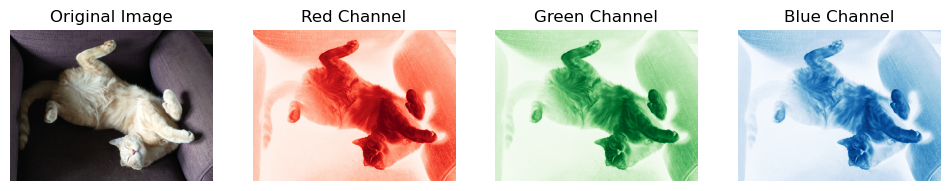

In [25]:
# Display the image and its color channels
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(red_channel, cmap='Reds')
plt.title("Red Channel")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(green_channel, cmap='Greens')
plt.title("Green Channel")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(blue_channel, cmap='Blues')
plt.title("Blue Channel")
plt.axis('off')

plt.show()

## 3. GRAPHS <a class="anchor" id="graphs"></a>

First, we will load the edges data into a pandas DataFrame. This dataset represents the connections between train stops, where each row indicates a pair of stations connected by a train line.

In [64]:
df_edges = pd.read_csv('Train_Stop_Edges.csv')
df_edges

,Station_A,Station_B
0,Maplewood Station,Silverbrook Junction
1,Silverbrook Junction,Pinecrest Depot
2,Pinecrest Depot,Sunset Plaza
3,Sunset Plaza,Riverside Park
4,Riverside Park,Hilltop Heights
5,Hilltop Heights,Crystal Lake
6,Crystal Lake,Oceanview Terrace
7,Oceanview Terrace,Golden Gate
8,Golden Gate,Mystic Falls
9,Mystic Falls,Emerald Gardens


### 3.1. Importing NetworkX <a class="anchor" id="networkx"></a>

To work with graphs, we will use the [NetworkX](https://networkx.org/) library, a powerful tool for creating, manipulating, and analyzing networks of nodes and edges. 
If you don't have NetworkX installed, you can easily install it using [*"pip install networkx"*](https://networkx.org/documentation/stable/install.html)

Now, let's import NetworkX and use it to work with our train stops graph.

In [65]:
import networkx as nx

Next, we will build an undirected graph from the edges data using NetworkX.
We can use [`nx.from_pandas_edgelist()`](https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html) to create the graph directly from the DataFrame.

### 3.2. Building an Undirected Graph from a DataFrame <a class="anchor" id="graph"></a>

In [66]:
# Create the graph from the edges DataFrame
G = nx.from_pandas_edgelist(df_edges, 'Station_A', 'Station_B')
G

### 3.3. Accessing Attributes of the Graph <a class="anchor" id="graph_attributes"></a>

Once we have built our graph using NetworkX, we can access various attributes and properties of the graph, nodes, and edges. 

In [67]:
G.edges

EdgeView([('Maplewood Station', 'Silverbrook Junction'), ('Maplewood Station', 'Emerald Gardens'), ('Maplewood Station', 'Whispering Pines'), ('Maplewood Station', 'Highland Meadows'), ('Silverbrook Junction', 'Pinecrest Depot'), ('Silverbrook Junction', 'Shadow Valley'), ('Silverbrook Junction', 'Willow Creek'), ('Silverbrook Junction', 'Blue Ridge'), ('Pinecrest Depot', 'Sunset Plaza'), ('Pinecrest Depot', 'Blue Ridge'), ('Pinecrest Depot', 'Lakeside Village'), ('Sunset Plaza', 'Riverside Park'), ('Riverside Park', 'Hilltop Heights'), ('Hilltop Heights', 'Crystal Lake'), ('Crystal Lake', 'Oceanview Terrace'), ('Oceanview Terrace', 'Golden Gate'), ('Golden Gate', 'Mystic Falls'), ('Mystic Falls', 'Emerald Gardens'), ('Mystic Falls', 'Whispering Pines'), ('Whispering Pines', 'Lakeside Village'), ('Blue Ridge', 'Lakeside Village'), ('Blue Ridge', 'Mountain View'), ('Lakeside Village', 'Mountain View')])

In [68]:
G.nodes

NodeView(('Maplewood Station', 'Silverbrook Junction', 'Pinecrest Depot', 'Sunset Plaza', 'Riverside Park', 'Hilltop Heights', 'Crystal Lake', 'Oceanview Terrace', 'Golden Gate', 'Mystic Falls', 'Emerald Gardens', 'Whispering Pines', 'Highland Meadows', 'Shadow Valley', 'Blue Ridge', 'Lakeside Village', 'Mountain View', 'Willow Creek'))

### 3.4. Drawing the Graph <a class="anchor" id="graph_drawing"></a>

NetworkX provides various methods to visualize graphs, including different algorithms to place the nodes in a plot. Common layout algorithms include:

- [**Spring Layout**](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_spring.html#networkx.drawing.nx_pylab.draw_spring): Positions nodes using a force-directed algorithm.
- [**Circular Layout**](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.circular_layout.html#networkx.drawing.layout.circular_layout): Positions nodes in a circle.
- [**Random Layout**](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.random_layout.html#networkx.drawing.layout.random_layout): Positions nodes randomly.
- [**Shell Layout**](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.shell_layout.html#networkx.drawing.layout.shell_layout): Positions nodes in concentric circles.
- [**Spectral Layout**](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spectral_layout.html#networkx.drawing.layout.spectral_layout): Positions nodes using spectral embedding

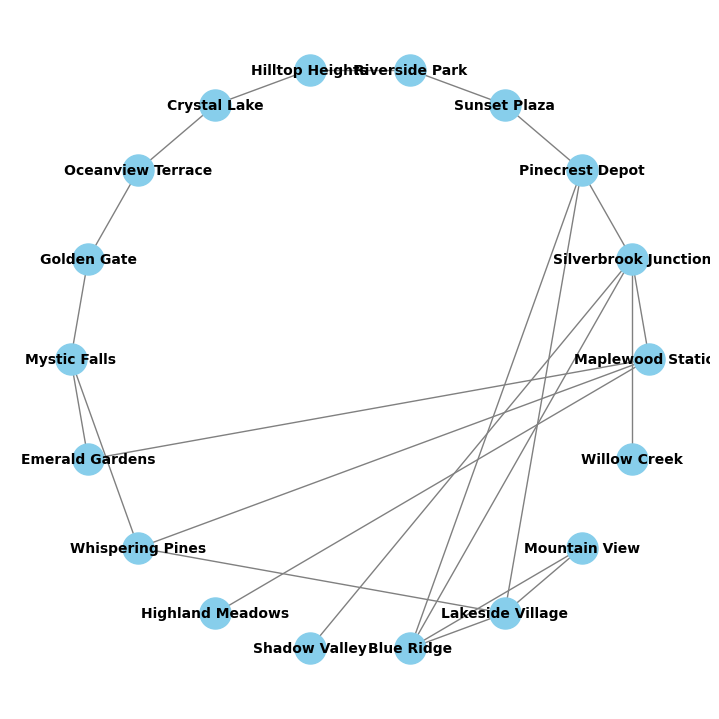

In [69]:
# Plot the graph using circular layout
plt.figure(figsize=(7, 7))
nx.draw_circular(G, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')

For our graph, we will use the geographical positions we have for the train stops to accurately reflect their real-world locations

In [70]:
df_positions = pd.read_csv('Train_Stop_Positions.csv')
df_positions

,Station,X,Y
0,Maplewood Station,1,5.0
1,Silverbrook Junction,2,5.0
2,Pinecrest Depot,3,5.0
3,Sunset Plaza,4,5.0
4,Riverside Park,5,5.0
5,Hilltop Heights,5,4.0
6,Crystal Lake,5,3.0
7,Oceanview Terrace,5,2.0
8,Golden Gate,4,2.0
9,Mystic Falls,3,2.0


In [71]:
# Create a dictionary of positions directly from the DataFrame
pos = df_positions.set_index('Station')[['X', 'Y']].T.to_dict('list')
pos

{'Maplewood Station': [1.0, 5.0],
 'Silverbrook Junction': [2.0, 5.0],
 'Pinecrest Depot': [3.0, 5.0],
 'Sunset Plaza': [4.0, 5.0],
 'Riverside Park': [5.0, 5.0],
 'Hilltop Heights': [5.0, 4.0],
 'Crystal Lake': [5.0, 3.0],
 'Oceanview Terrace': [5.0, 2.0],
 'Golden Gate': [4.0, 2.0],
 'Mystic Falls': [3.0, 2.0],
 'Emerald Gardens': [2.0, 2.0],
 'Willow Creek': [1.0, 2.0],
 'Redwood Crossing': [1.0, 4.0],
 'Blue Ridge': [3.0, 4.0],
 'Lakeside Village': [3.0, 3.0],
 'Whispering Pines': [3.0, 2.5],
 'Highland Meadows': [0.0, 5.0],
 'Shadow Valley': [0.0, 4.0],
 'Mountain View': [0.0, 3.0],
 'Cedar Point': [0.0, 2.0]}

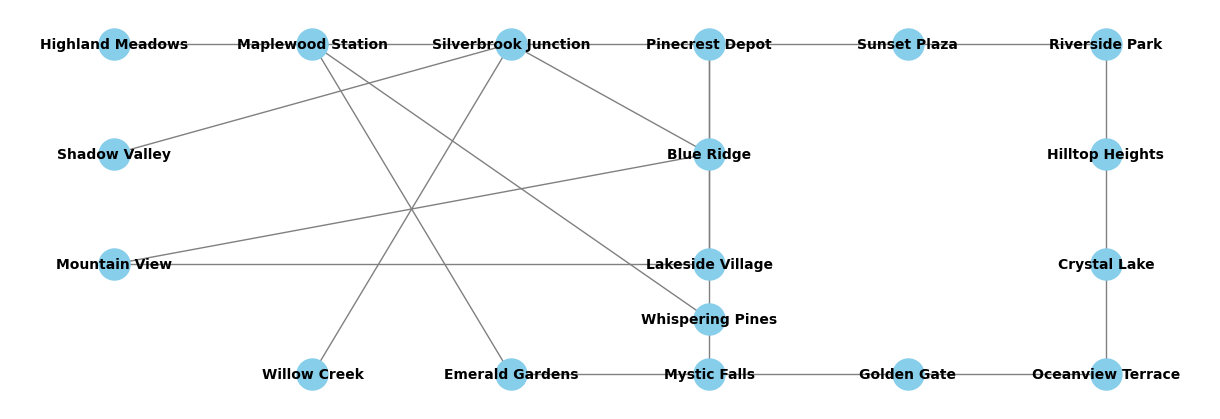

In [72]:
# Plot the graph
plt.figure(figsize=(12, 4))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')

### 3.5. Getting the Adjacency Matrix  <a class="anchor" id="adjacency"></a>

An adjacency matrix is a square matrix used to represent a graph, with the elements indicating whether pairs of vertices are adjacent or not. For an undirected graph, the adjacency matrix is symmetric.

Let's show how to obtain the adjacency matrix, check its size, and verify its symmetry.

In [74]:
# Get the adjacency matrix
A = nx.adjacency_matrix(G).todense()
A

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [77]:
# Check if the adjacency matrix is symmetric
np.allclose(A, A.T)

True

### 3.6. Building a Directed Graph from a DataFrame <a class="anchor" id="directed_graph"></a>

If we wanted to build a directed graph from the same DataFrame, we can use the `nx.from_pandas_edgelist()` function with the `create_using` parameter set to `nx.DiGraph()`. This will specify that the graph should be directed.

In [80]:
# Create the directed graph from the edges DataFrame
DG = nx.from_pandas_edgelist(df_edges, 'Station_A', 'Station_B', create_using=nx.DiGraph())
DG

After building the directed graph, we can obtain its adjacency matrix and check if it is not symmetric.

In [81]:
A = nx.adjacency_matrix(DG).todense()
A

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [82]:
# Check if the adjacency matrix is symmetric
np.allclose(A,A.T)

False

## 4. TEXT DATA <a class="anchor" id="text"></a>

In this section, we will explore document embeddings using word counts and TF-IDF values. These methods transform text data into numerical representations that machine learning algorithms can process. 

We have a toy dataset consisting of five sentences.

In [153]:
documents = [
    "The cat sat on the mat.",
    "The dog chased the cat.",
    "The cat climbed the tree.",
    "The dog barked loudly.",
    "A dog and a cat are friends."
]

### 4.1. Count Vectorizer <a class="anchor" id="count_vectorizer"></a>

First, we will use the [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) from [`sklearn`](https://scikit-learn.org/stable/) to transform the text data into a matrix of token counts.

In [154]:
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the documents to a document-term matrix
A = vectorizer.fit_transform(documents)
A

<5x14 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

The resulting matrix is a sparse matrix, which we can transform into a dense matrix for easier manipulation.

In [155]:
A = A.todense()
A

matrix([[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0],
        [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1],
        [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
        [1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]], dtype=int64)

we can access the vocabulary generated by the vectorizer

In [156]:
vectorizer.get_feature_names_out()

array(['and', 'are', 'barked', 'cat', 'chased', 'climbed', 'dog',
       'friends', 'loudly', 'mat', 'on', 'sat', 'the', 'tree'],
      dtype=object)

We can convert the dense matrix to a DataFrame for better readability.
Each row in `count_df` represents one of the documents from the dataset.
Each column represents a unique word (token) from the vocabulary.
The values in the matrix represent the count of each word in the corresponding document.

In [157]:
count_df = pd.DataFrame(data=A, index=documents, columns=vectorizer.get_feature_names_out())
count_df

,and,are,barked,cat,chased,climbed,dog,friends,loudly,mat,on,sat,the,tree
The cat sat on the mat.,0,0,0,1,0,0,0,0,0,1,1,1,2,0
The dog chased the cat.,0,0,0,1,1,0,1,0,0,0,0,0,2,0
The cat climbed the tree.,0,0,0,1,0,1,0,0,0,0,0,0,2,1
The dog barked loudly.,0,0,1,0,0,0,1,0,1,0,0,0,1,0
A dog and a cat are friends.,1,1,0,1,0,0,1,1,0,0,0,0,0,0


### 4.2. TF-IDF Vectorizer <a class="anchor" id="tf_idf_vectorizer"></a>

Next, we will use the [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) from [`sklearn`](https://scikit-learn.org/stable/) to transform the text data into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) values. 

In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents to a TF-IDF matrix
A = tfidf_vectorizer.fit_transform(documents)

In [159]:
# Convert the sparse TF-IDF matrix to a dense matrix
A = A.toarray()

In [160]:
# Convert the dense matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(data=A, index=documents, columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,and,are,barked,cat,chased,climbed,dog,friends,loudly,mat,on,sat,the,tree
The cat sat on the mat.,0.000000,0.000000,0.000000,0.263050,0.000000,0.000000,0.000000,0.000000,0.000000,0.466913,0.466913,0.466913,0.526101,0.000000
The dog chased the cat.,0.000000,0.000000,0.000000,0.323361,0.573963,0.000000,0.384390,0.000000,0.000000,0.000000,0.000000,0.000000,0.646722,0.000000
The cat climbed the tree.,0.000000,0.000000,0.000000,0.297466,0.000000,0.528001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.594933,0.528001
The dog barked loudly.,0.000000,0.000000,0.601285,0.000000,0.000000,0.000000,0.402688,0.000000,0.601285,0.000000,0.000000,0.000000,0.338754,0.000000
A dog and a cat are friends.,0.515306,0.515306,0.000000,0.290314,0.000000,0.000000,0.345106,0.515306,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 4.3. Lemmatizing <a class="anchor" id="lemmatizing"></a>

Lemmatizing is the process of reducing words to their base or root form (known as the lemma).
This helps in normalizing the text data by treating different forms of a word (e.g., "running" and "ran") as the same term.
The easiest way to perform lemmatization in Python is by using the [`nltk` library](https://www.nltk.org/), specifically its [WordNetLemmatizer](https://www.nltk.org/api/nltk.stem.WordNetLemmatizer.html?highlight=wordnet).

In [161]:
documents = [
    "The cats are sitting on the mats.",
    "The dogs were chasing the cat.",
    "The cat climbs the trees.",
    "The dogs barked loudly.",
    "A dog and a cat are friends.",
    "The children are playing in the garden.",
    "She runs every morning.",
    "He is running a marathon.",
    "The birds were flying high in the sky.",
    "They were eating their breakfast."
]

 If you haven't installed the nltk library yet, you can do so using *"pip install nltk"*

Import NLTK and download WordNet data.

In [162]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download the WordNet data
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional: download the WordNet data in other languages if needed
nltk.download('punkt')  # Download Punkt tokenizer
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to C:\Users\javier.perez-
[nltk_data]     alvaro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\javier.perez-
[nltk_data]     alvaro\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\javier.perez-
[nltk_data]     alvaro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\javier.perez-
[nltk_data]     alvaro\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Helper function to convert NLTK POS (part of speech) tags to WordNet POS tags

In [163]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

Define a lemmatization function

In [164]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    lemmatized_words = [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags
    ]
    return ' '.join(lemmatized_words)

Apply lemmatization to the documents

In [165]:
lemmatized_documents = [lemmatize_text(doc) for doc in documents]

# Convert to a DataFrame for better readability
lemmatized_documents_df = pd.DataFrame(lemmatized_documents, columns=["Lemmatized Document"])

print("Lemmatized Documents:")
print(lemmatized_documents_df)

Lemmatized Documents:
                 Lemmatized Document
0        The cat be sit on the mat .
1         The dog be chase the cat .
2           The cat climb the tree .
3              The dog bark loudly .
4        A dog and a cat be friend .
5  The child be play in the garden .
6            She run every morning .
7             He be run a marathon .
8  The bird be fly high in the sky .
9      They be eat their breakfast .


### 4.4. Removing Stop Words and Punctuation <a class="anchor" id="stop_words"></a>

In [166]:
documents = [
    "Hello! This is an example sentence, with punctuation.",
    "Another example sentence; it has more punctuation and stop words.",
    "Text preprocessing is essential: it helps in cleaning the text.",
    "We will remove stop words, like 'the', 'is', and 'and'.",
    "Punctuation removal is also important; it simplifies the text."
]

Before lemmatizing, we may want to remove stop words and punctuation to clean the text data. Stop words are common words that usually do not contribute to the meaning of the text (e.g., "and", "the", "is"). 

We can use the `nltk` library to remove stop words and punctuation.

In [167]:
import nltk
from nltk.corpus import stopwords
import string

# Download the required NLTK data files
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\javier.perez-
[nltk_data]     alvaro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\javier.perez-
[nltk_data]     alvaro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Define a function to remove stop words and punctuation

In [148]:
def preprocess_text(text):
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove punctuation and stop words, and convert to lowercase
    words = [word.lower() for word in words if word.isalnum() and word.lower() not in stopwords.words('english')]
    return ' '.join(words)

Apply the preprocessing function to the documents

In [150]:
preprocessed_documents = [preprocess_text(doc) for doc in documents]

In [151]:
preprocessed_documents

['hello example sentence punctuation',
 'another example sentence punctuation stop words',
 'text preprocessing essential helps cleaning text',
 'remove stop words like',
 'punctuation removal also important simplifies text']